In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/ecommerce-data/data.csv",  encoding= 'unicode_escape') 

In [4]:
df.head(5) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# df.drop("InvoiceNo",axis=1,inplace=True)
# df.drop("CustomerID",axis=1,inplace=True)

In [7]:
date = pd.to_datetime(df.InvoiceDate)

In [8]:
df["day"] = date.map(lambda x: x.day)
df["month"] =date.map(lambda x: x.month)
df["year"] = date.map(lambda x: x.year)
df["Date"]=date.dt.date

In [9]:
# df.drop("InvoiceDate",axis=1,inplace=True)

In [10]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,2010,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,2010,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,1,12,2010,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,1,12,2010,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1,12,2010,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,1,12,2010,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,1,12,2010,2010-12-01


In [11]:
rows=df.shape[0]
cols=df.shape[1]
print(f"rows are {rows} , columns are {cols}" )

rows are 541909 , columns are 12


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   day          541909 non-null  int64  
 9   month        541909 non-null  int64  
 10  year         541909 non-null  int64  
 11  Date         541909 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 49.6+ MB


In [13]:
print('Duplicates: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)


Duplicates: 5268


In [14]:
 cate_columns=df.select_dtypes(include=['category','object'])
 

In [15]:
numeric_columns=df.select_dtypes(include=['int','float'])
 

In [16]:
def get_null_values_info(df):
     
    a=df.isnull().sum()
    df1=pd.DataFrame({"Null Values":a})
    return df1
    

In [17]:
def draw_boxplot(df):
    plt.figure(figsize=(28,100))
    plotnumber=1
    for i in numeric_columns.columns:
        ax=plt.subplot(30,3,plotnumber)
        sns.boxplot(numeric_columns[i])
    #     plt.title(i,size=20)
        plt.xlabel(i )
    #     plt.xticks(rotation=70, size = 15)
        plotnumber+=1
    plt.show() 

In [18]:
def draw_dist(df):    
    plt.figure(figsize=(28,80))
    plotnumber=1
    for i in df.columns:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(x=df[i], color = 'g',    kde_kws={"color": "r", "lw": 3, "label": "KDE"})
    #     plt.title(i)
        plt.xlabel(i, size = 20)
    #     plt.xticks(rotation=70)
        plotnumber+=1
    plt.show()


In [19]:
def draw_hist(df):
    plt.figure(figsize=(28,100))
    plotnumber=1
    for i in df.columns:
        ax=plt.subplot(15,3,plotnumber)
        df[i].hist() 

        plt.title(i,size=20)
        plotnumber+=1
    plt.show() 
 

In [20]:
null_values=get_null_values_info(df)
null_values

,Null Values
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0
day,0
month,0


In [21]:
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,Date
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom,1,12,2010,2010-12-01
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom,1,12,2010,2010-12-01
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom,1,12,2010,2010-12-01
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom,1,12,2010,2010-12-01
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom,1,12,2010,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom,9,12,2011,2011-12-09
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom,9,12,2011,2011-12-09
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom,9,12,2011,2011-12-09
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom,9,12,2011,2011-12-09


In [22]:
 
print(f' Null values % is :{df.Description.isnull().sum()*100/df.shape[0] }'   )

 Null values % is :0.2709446352403189


In [23]:
c=df.Country.value_counts()
a=df.Country.value_counts().index 
b=df.Country.value_counts()
for i in range(len(a)):
    print(f'{a[i] } has count  {b[i]}')

United Kingdom has count  490300
Germany has count  9480
France has count  8541
EIRE has count  8184
Spain has count  2528
Netherlands has count  2371
Belgium has count  2069
Switzerland has count  1994
Portugal has count  1510
Australia has count  1258
Norway has count  1086
Italy has count  803
Channel Islands has count  757
Finland has count  695
Cyprus has count  611
Sweden has count  461
Unspecified has count  442
Austria has count  401
Denmark has count  389
Japan has count  358
Poland has count  341
Israel has count  294
USA has count  291
Hong Kong has count  284
Singapore has count  229
Iceland has count  182
Canada has count  151
Greece has count  146
Malta has count  127
United Arab Emirates has count  68
European Community has count  61
RSA has count  58
Lebanon has count  45
Lithuania has count  35
Brazil has count  32
Czech Republic has count  30
Bahrain has count  19
Saudi Arabia has count  10


In [24]:
top_10=c.sort_values(ascending=False).head(10) 
print(top_10)

United Kingdom    490300
Germany             9480
France              8541
EIRE                8184
Spain               2528
Netherlands         2371
Belgium             2069
Switzerland         1994
Portugal            1510
Australia           1258
Name: Country, dtype: int64


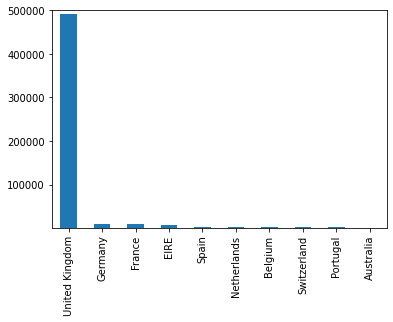

In [25]:
top_10.plot.bar()
plt.ylim(top_10.min(),(top_10.max()+10000))
plt.show()

In [26]:
df.groupby([ "day" ])["Quantity"].count().sort_values(ascending=False).head(10)

day
8     24421
6     23910
7     22820
17    22618
5     21822
10    19792
4     19367
21    19104
18    18967
20    18909
Name: Quantity, dtype: int64

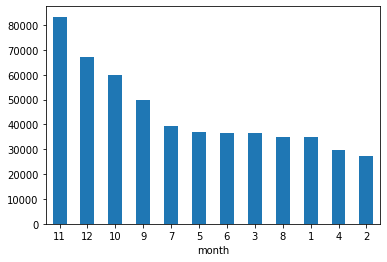

In [27]:
df.groupby([ "month"])["Quantity"].count().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=0)
plt.show()

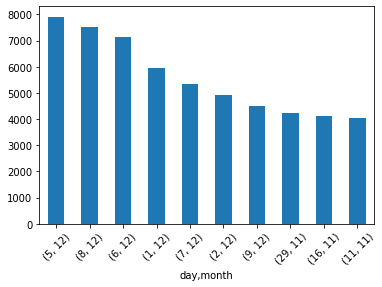

In [28]:
df.groupby([ "day", "month"])["Quantity"].count().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=45)
plt.show()

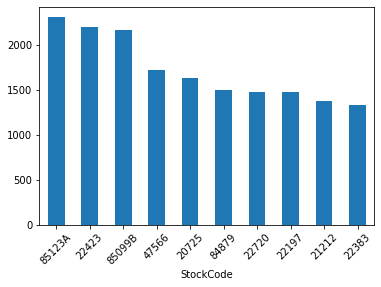

In [29]:
df.groupby([ "StockCode" ])["Quantity"].count().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=45)
plt.show()

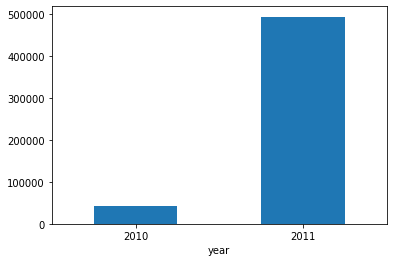

In [30]:
df.groupby(  "year" )["Quantity"].count().plot.bar() 
plt.xticks(rotation=0)
plt.show()

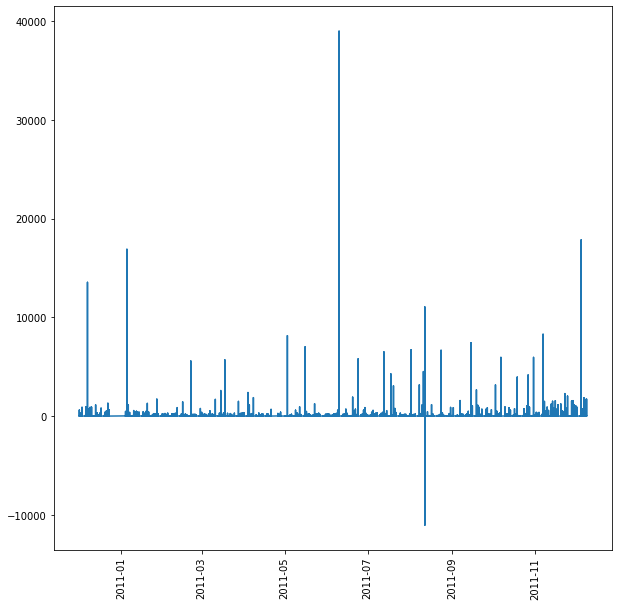

In [31]:
a = df.sort_values('Date', ascending=True)
ax=plt.figure(figsize=(10,10))
plt.plot(a['Date'], a['UnitPrice'])
# ax.set_xlim(a.Date.min, a.Date.max)
plt.xticks(rotation='vertical')
plt.show()

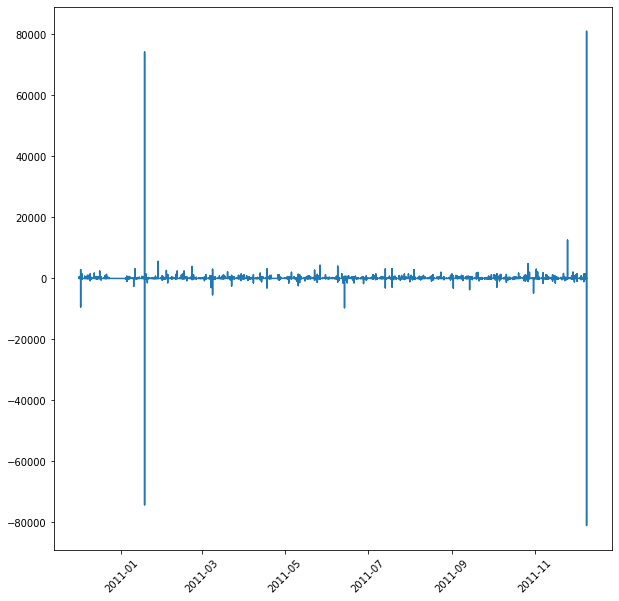

In [32]:
ax=plt.figure(figsize=(10,10)) 
plt.plot(a['Date'], a['Quantity'])
plt.xticks(rotation=45)
plt.show()

In [33]:
df['order_canceled'] = df['InvoiceNo'].apply(lambda x:int('C' in x))
display(df[:5])
#______________________________________________________________________________________________
n1 = df['order_canceled'].sum()
n2 = df.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,Date,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,2010,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,2010,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,2010,2010-12-01,0


Number of orders canceled: 9251/536641 (1.72%) 


In [34]:
n=df[df['order_canceled'] == 1] 
p=df[df['order_canceled'] == 0]

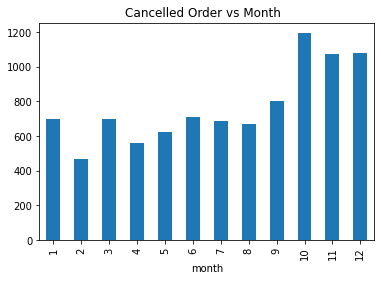

In [35]:
n.groupby("month")["order_canceled"].size().plot.bar()
plt.title("Cancelled Order vs Month  ")
# plt.legend( )
plt.show()

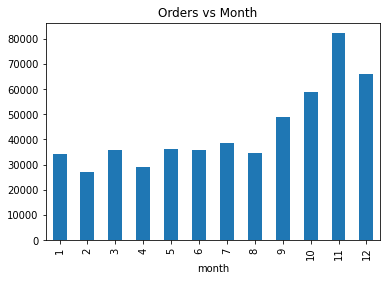

In [36]:
p.groupby("month")["order_canceled"].size().plot.bar()
plt.title("Orders vs Month   ")
# plt.legend( )
plt.show()

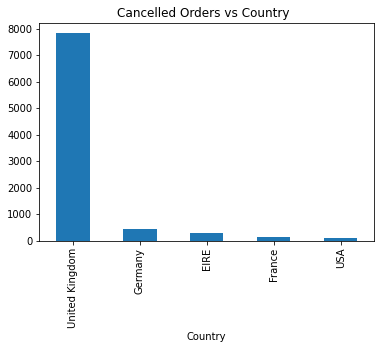

In [37]:
n.groupby("Country")["order_canceled"].size().sort_values(ascending=False).head().plot.bar()
plt.title("Cancelled Orders vs Country  ")
# plt.legend( )
plt.show()

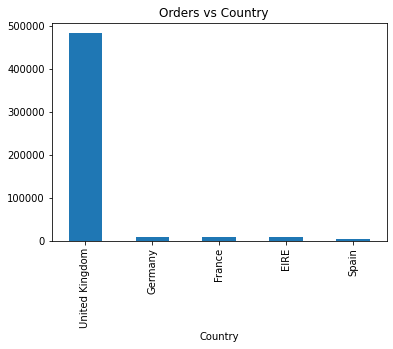

In [38]:
p.groupby("Country")["order_canceled"].size().sort_values(ascending=False).head().plot.bar()
plt.title("Orders vs Country   ")
# plt.legend( )
plt.show()

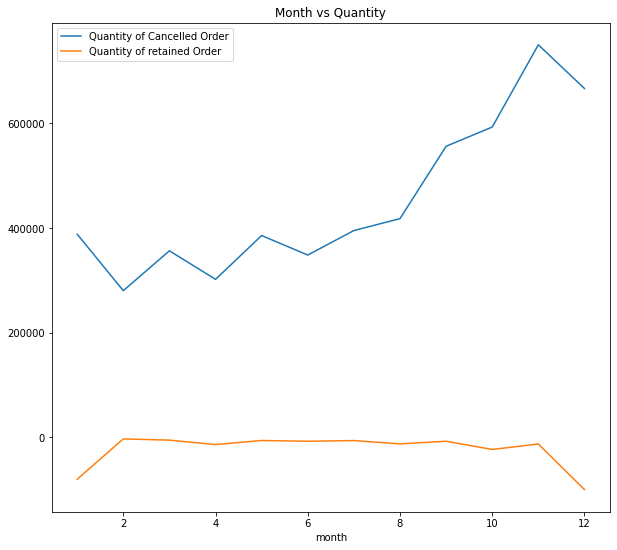

In [39]:
plt.figure(figsize=(10,9)) 
p.groupby("month")["Quantity"].sum().plot.line()
n.groupby("month")["Quantity"].sum().plot.line()
plt.title("Month vs Quantity")
plt.legend(["Quantity of Cancelled Order","Quantity of retained Order"])

plt.show()

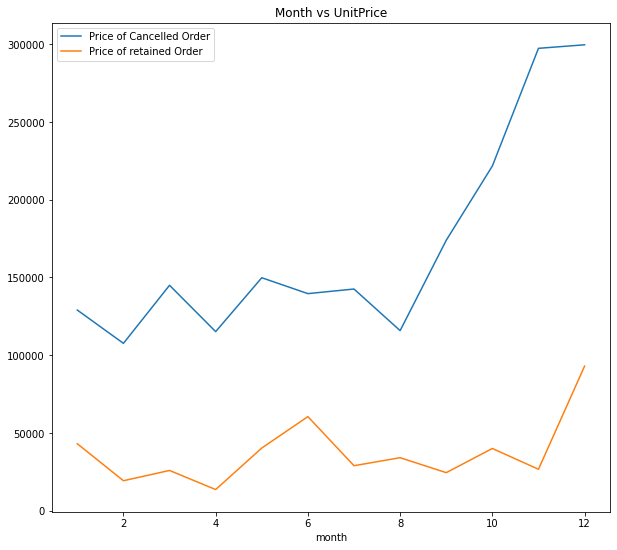

In [40]:
plt.figure(figsize=(10,9)) 
p.groupby("month")["UnitPrice"].sum().plot.line()
n.groupby("month")["UnitPrice"].sum().plot.line()
plt.title("Month vs UnitPrice")
plt.legend(["Price of Cancelled Order","Price of retained Order"])
plt.show()

In [41]:
# f, ax = plt.subplots(1, 1)
# ax=sns.lineplot(data=n,x="hour",y="Amount" ,color='red' ,label="Fraud",ci=None)
# sns.lineplot(data=p,x="hour",y="Amount" ,color='green',  label="Normal",ax=ax,ci=None)
# # plt.legend(["Frauda","Normal"])
# plt.title("Hour vs Amount")
# plt.show()

In [42]:
# df.dropna( )

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

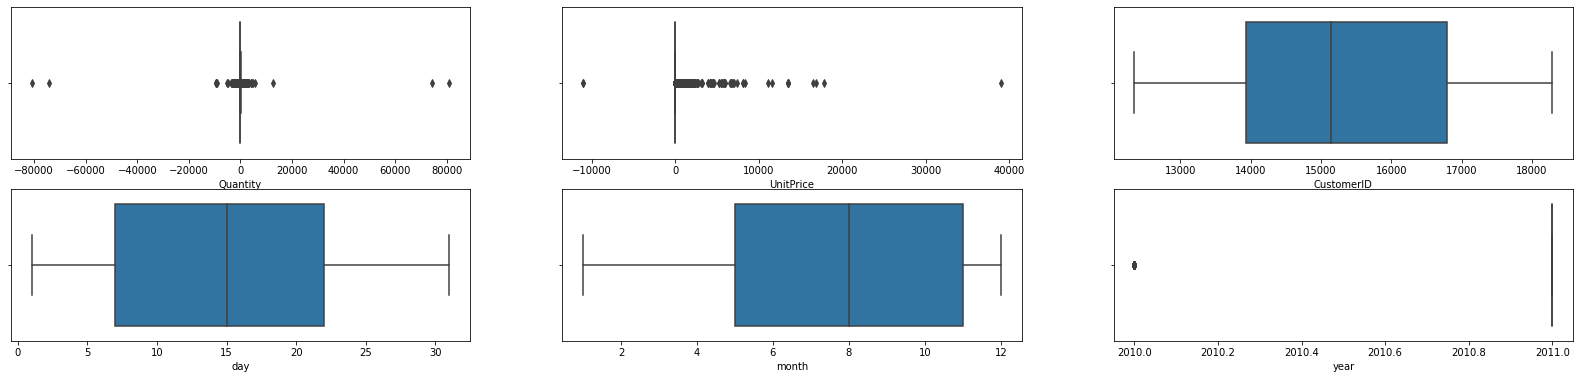

In [43]:
draw_boxplot(numeric_columns)

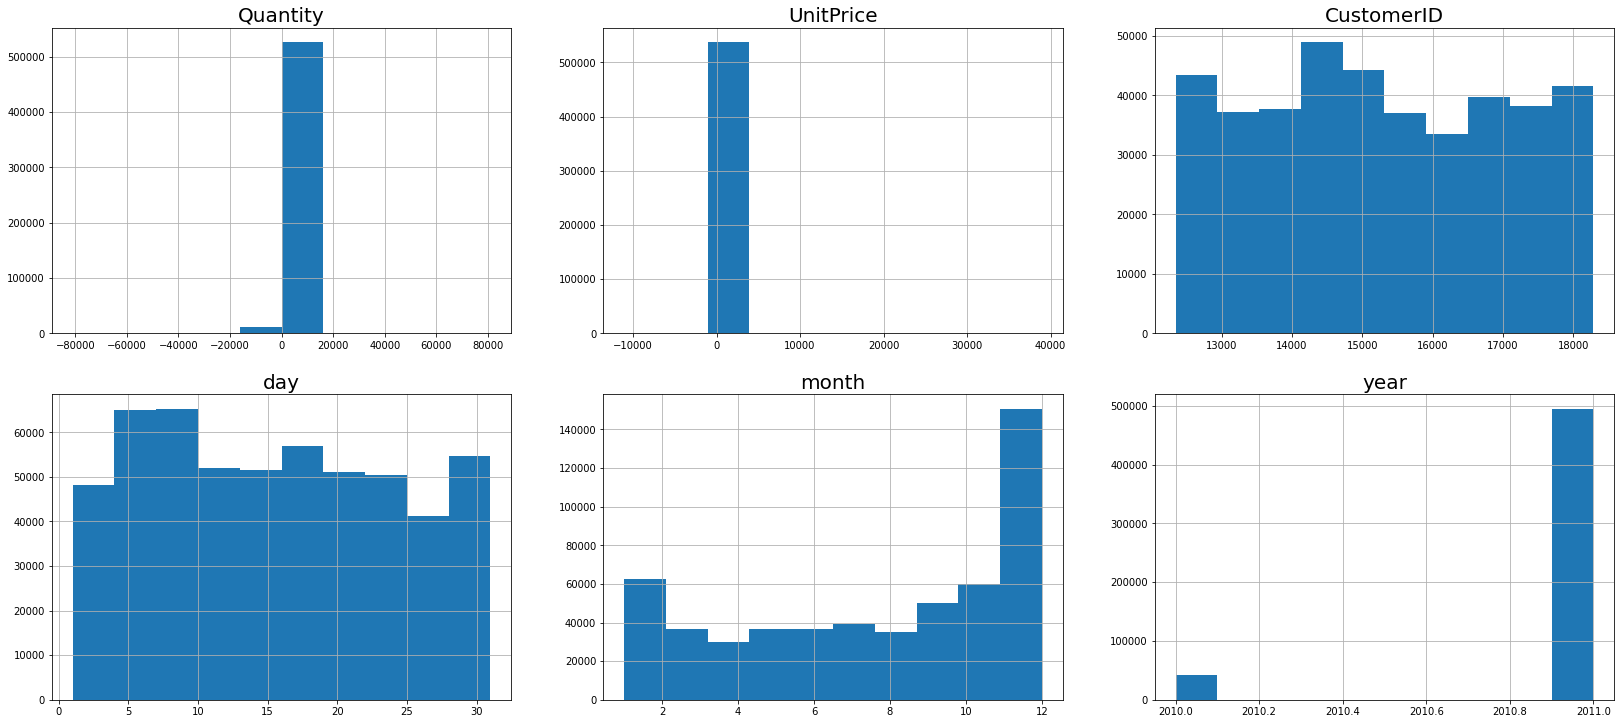

In [44]:
draw_hist(numeric_columns)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

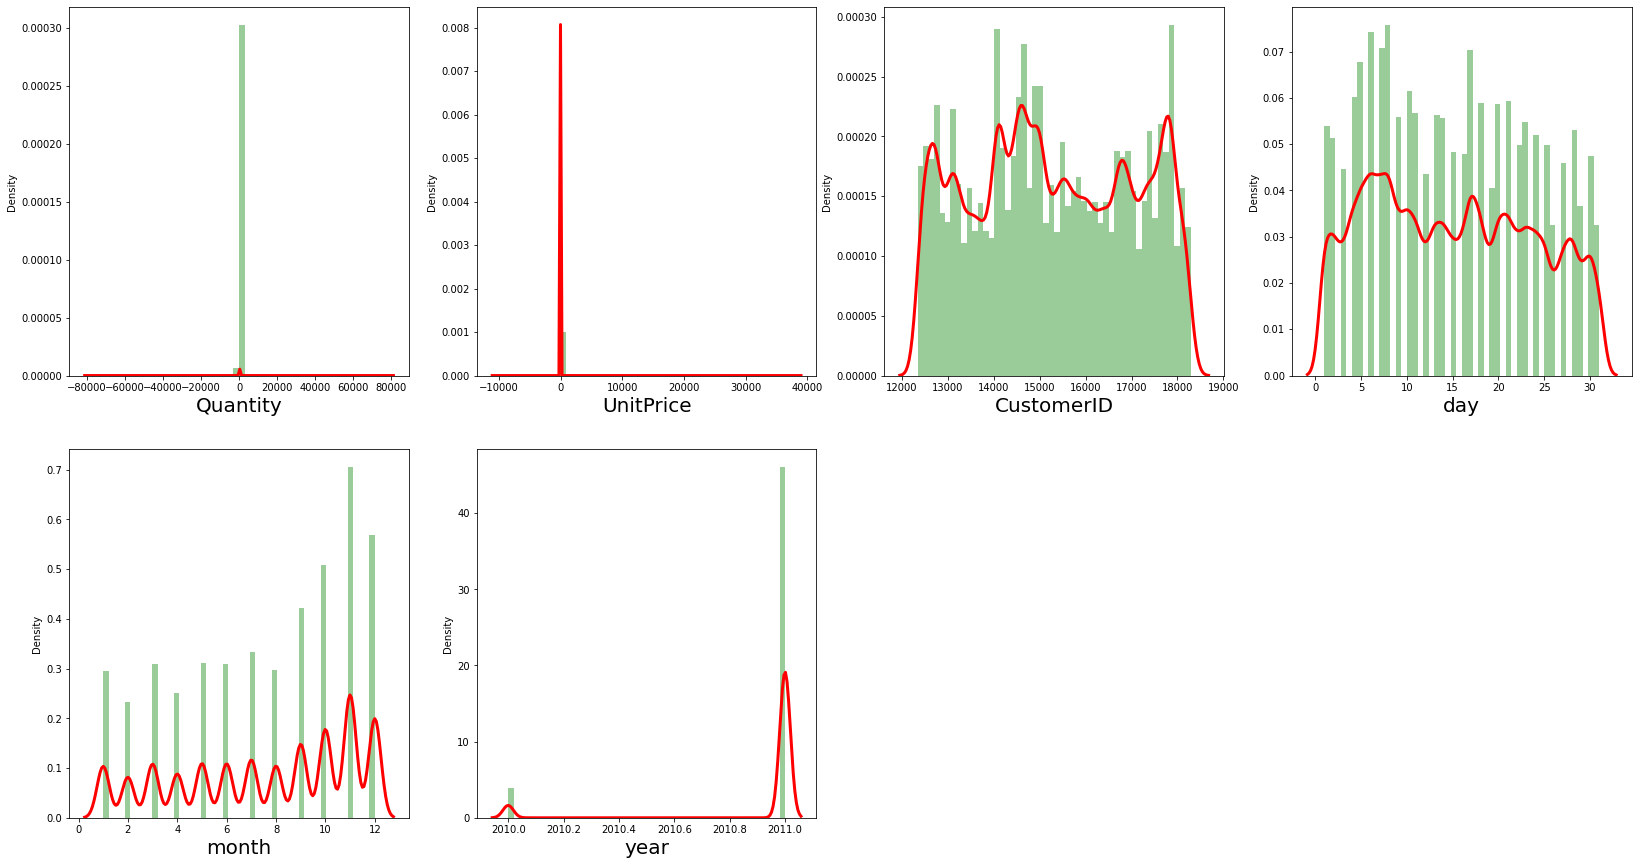

In [45]:
draw_dist(numeric_columns)

In [46]:
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
bucket = temp.rename(columns = {'InvoiceDate':'Number of products'})
bucket[:10].sort_values('CustomerID')


,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


In [47]:
list_special_codes = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

In [48]:
for code in list_special_codes:
    print("{:<15} -> {:<10}".format(code, df[df['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE   
D               -> Discount  
C2              -> CARRIAGE  
DOT             -> DOTCOM POSTAGE
M               -> Manual    
BANK CHARGES    -> Bank Charges
S               -> SAMPLES   
AMAZONFEE       -> AMAZON FEE
DCGS0076        -> SUNJAR LED NIGHT NIGHT LIGHT
DCGS0003        -> BOXED GLASS ASHTRAY
gift_0001_40    -> Dotcomgiftshop Gift Voucher £40.00
DCGS0070        -> CAMOUFLAGE DOG COLLAR
m               -> Manual    
gift_0001_50    -> Dotcomgiftshop Gift Voucher £50.00
gift_0001_30    -> Dotcomgiftshop Gift Voucher £30.00
gift_0001_20    -> Dotcomgiftshop Gift Voucher £20.00
DCGS0055        -> nan       
DCGS0072        -> nan       
DCGS0074        -> nan       
DCGS0069        -> OOH LA LA DOGS COLLAR
DCGS0057        -> nan       
DCGSSBOY        -> BOYS PARTY BAG
DCGSSGIRL       -> GIRLS PARTY BAG
gift_0001_10    -> Dotcomgiftshop Gift Voucher £10.00
PADS            -> PADS TO MATCH ALL CUSHIONS
DCGS0004        -> HAYNES CAMPER SHOULDER BAG
DCGS

In [49]:
df_produits = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})

In [50]:
df_produits

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
4219,????damages????
4220,mixed up
4221,lost
4222,CREAM HANGING HEART T-LIGHT HOLDER


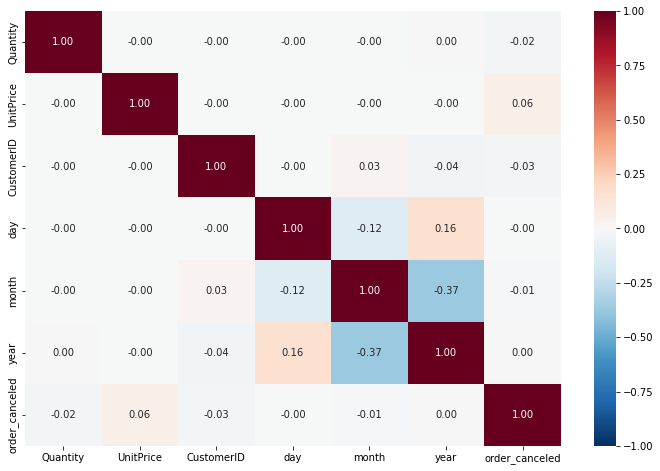

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmax=1, vmin=-1,fmt='.2f')
plt.show()